# Analiza rabljenih bark
V tem dokumentu je analiza podatkov rabljenih bark pridobljenih iz [Boat24](https://www.boat24.com/en/), narejena je s pomočjo knjižnice *pandas*, *matplotlib* ter *numpy*. Analizirane so barke na motor, torej ni jadrnic.



In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

barke = pd.read_csv("podatki_bark.csv", index_col="id")
pd.options.display.max_rows = 20

barke

,ime_barke,tip_barke,cena,dolzina,sirina,letnik,st_kabin,st_ur,drzava
id,,,,,,,,,
1,AZIMUT 46 FLY,Flybridge,NaN,14.90,4.45,2003.0,3.0,930.0,Italy
10,Riviera Marine 51 Flybridge,Flybridge,440000.0,16.67,4.93,2004.0,3.0,1000.0,NaN
100,Pershing 72,Motor Yacht,NaN,22.35,5.50,2007.0,NaN,645.0,Italy
1000,Manò Marine 3850,Cabin Cruiser,135000.0,12.00,4.10,2008.0,3.0,690.0,Italy
1001,Crownline 315 sr,Offshore Boat,72000.0,9.90,3.00,2007.0,2.0,650.0,Italy
...,...,...,...,...,...,...,...,...,...
994,Four Winns Vista 288,Sport Boat,45000.0,8.31,2.95,2008.0,2.0,400.0,Italy
995,Ilver Galaxi 28,Sport Boat,35000.0,8.60,3.05,1995.0,1.0,645.0,Italy
996,FIM REGINA 340 - FUORIBORDO YAMAHA #16,Motor Yacht,340000.0,9.98,3.00,2023.0,1.0,NaN,Italy


Za začetek je tukaj tabela vseh podatkov, ki sem jih zajel v analizi, posamično plovilo predstavlja ena vrstica tabele.



In [22]:
barke.sort_values("cena", ascending=False).head(1)

,ime_barke,tip_barke,cena,dolzina,sirina,letnik,st_kabin,st_ur,drzava
id,,,,,,,,,
631,Mondo marine ALEXANDER AGAIN,Superyacht,17500000.0,49.15,9.0,NaN,6.0,3924.0,Italy


In [21]:
barke.sort_values("cena").head(1)

,ime_barke,tip_barke,cena,dolzina,sirina,letnik,st_kabin,st_ur,drzava
id,,,,,,,,,
1133,Eolo Powercraft Eolo - Tobago,Sport Boat,4500.0,5.3,2.15,1994.0,NaN,NaN,Italy


Tukaj sta kot zanimivost najdražja in najcenejša barka.



<Axes: title={'center': 'Povprečna cena po tipih bark'}, xlabel='Tip barke'>

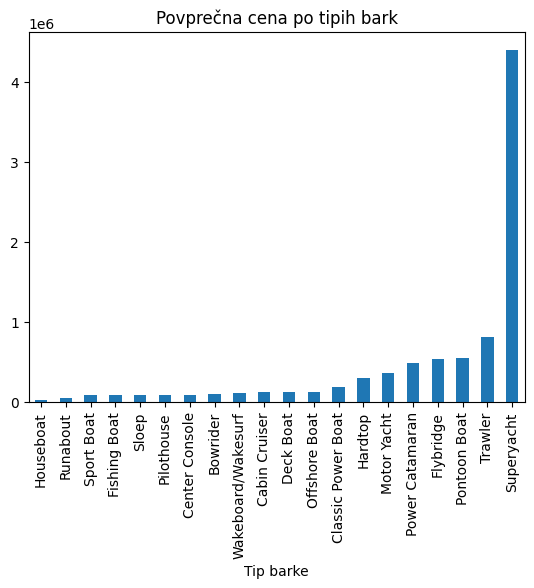

In [32]:
barke.groupby("tip_barke").mean(numeric_only=True).sort_values("cena").cena.plot.bar(title="Povprečna cena po tipih bark", xlabel="Tip barke")

Če gledamo le povprečne cene brez upoštevanja drugih faktorjeu, je očitno da bodo najdražje barke t.i. "Superyacht", ker so daleč največje. Spodaj je enak graf, le brez te kategorije.



<Axes: title={'center': 'Povprečna cena po tipih bark, brez superyacht'}, xlabel='Tip barke'>

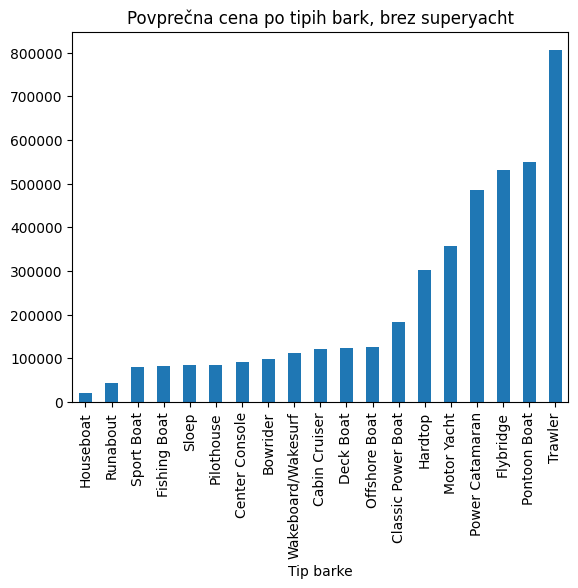

In [250]:
brez_superyacht = barke[barke.tip_barke != "Superyacht"]
brez_superyacht.groupby("tip_barke").mean(numeric_only=True).sort_values("cena").cena.plot.bar(title="Povprečna cena po tipih bark, brez superyacht", xlabel="Tip barke")

Vidimo, da so v povprečju najdražje barke tipa "trawler", potem jim sledijo "pontoon boat" toda ta je le ena, torej to ni neko merodajno povprečje. Na tretjem mestu so "flybridge", torej druga hipoteza ni bila pravilna.



Text(0.5, 1.0, 'Povprečne cene bark po dolžinah')

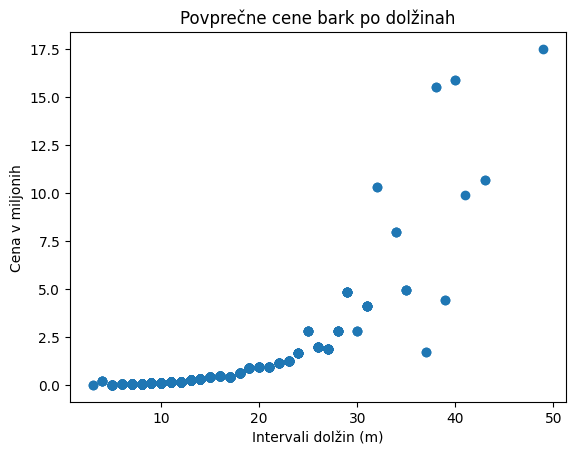

In [251]:
brez_na = barke.dropna(subset=["dolzina"]).copy()
brez_na.dolzina = brez_na.dolzina.astype(int)
intervali_dolzin = list(range(brez_na.dolzina.min(), brez_na.dolzina.max() + 2, 1))
brez_na_intervali = pd.cut(brez_na.dolzina, bins=intervali_dolzin, right=False)
brez_na_povprecje = brez_na.groupby(brez_na_intervali).cena.mean(numeric_only=True)
zdruzeno = brez_na.join(brez_na_povprecje, on=brez_na_intervali, rsuffix="_povprecje")

dolzine = zdruzeno.dolzina
cene = zdruzeno.groupby("dolzina").cena_povprecje.transform("first") / 10**6

plt.scatter(dolzine, cene)
plt.xlabel("Intervali dolžin (m)")
plt.ylabel("Cena v miljonih")
plt.title("Povprečne cene bark po dolžinah")

Graf nam prikazuje, kako se cena spreminja z dolžino, ker daljše barke tako izstopajo s ceno, je težko videti, kaj se zares dogaja. Spodaj bom enak graf prikazal malce drugače.



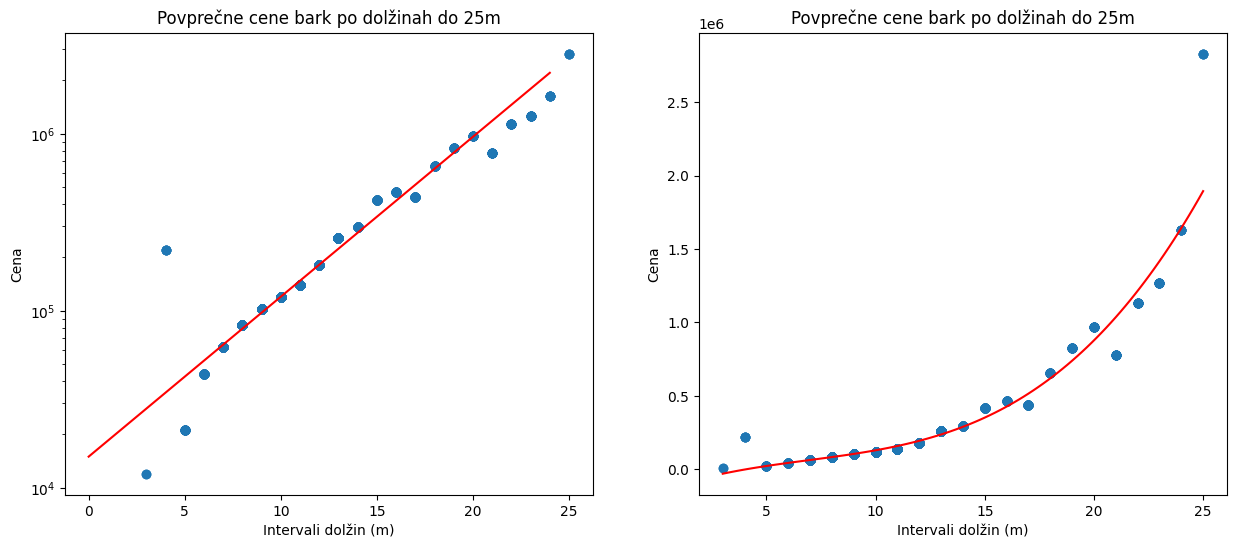

In [236]:
brez_na = barke.dropna(subset=["dolzina"])
brez_na.dolzina = brez_na.dolzina.astype(int)
brez_na = brez_na[brez_na.dolzina <= 25]
intervali_dolzin = list(range(brez_na.dolzina.min(), brez_na.dolzina.max() + 2, 1))
brez_na_intervali = pd.cut(brez_na.dolzina, bins=intervali_dolzin, right=False)
brez_na_povprecje = brez_na.groupby(brez_na_intervali).cena.mean(numeric_only=True)
zdruzeno = brez_na.join(brez_na_povprecje, on=brez_na_intervali, rsuffix="_povprecje")

dolzine = zdruzeno.dolzina
cene = zdruzeno.groupby("dolzina").cena_povprecje.transform("first") 

koeficienti = np.polyfit(dolzine, cene, 3)
polinom = np.poly1d(koeficienti)
x = np.linspace(dolzine.min(), dolzine.max(), 100)
y = polinom(x)

a, b = np.polyfit(dolzine, np.log(cene), 1)
x_2 = np.arange(25)


plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.scatter(dolzine, cene)
plt.yscale("log")
plt.plot(x_2, np.exp(a*x_2 + b), color="red")
plt.xlabel("Intervali dolžin (m)")
plt.ylabel("Cena")
plt.title("Povprečne cene bark po dolžinah do 25m")

plt.subplot(1, 2, 2)
plt.scatter(dolzine, cene)
plt.plot(x, y, color="red")
plt.xlabel("Intervali dolžin (m)")
plt.ylabel("Cena")
plt.title("Povprečne cene bark po dolžinah do 25m")

plt.show()

Zgornja dva grafa nam prikazujeta, kako se spreminjajo povprečne cene bark z vsakim metrom dolžine, dolžine so omejene na 25m, da lažje vidimo, kaj se dogaja ter ker za daljše barke ni bilo veliko podatkov. Na levem grafu je logaritemska skala, da lažje odčitamo povprečne cene. Dodal sem še regresije, da si morda lažje predstavljamo, kako cena raste. Iz drugega grafa vidimo, da povprečna cena bark začne močno rasti nad 15m dolžine. Torej 3. hipoteza ni bila povsem točna, cena ne začne strmo naraščati pri 10m, ampak pri 15m.



In [20]:
brez_na = barke.dropna(subset=["dolzina"]).copy()
brez_na.dolzina = brez_na.dolzina.astype(int)
brez_na = brez_na[brez_na.dolzina <= 25]
intervali_dolzin = list(range(brez_na.dolzina.min(), brez_na.dolzina.max() + 2, 1))
brez_na_intervali = pd.cut(brez_na.dolzina, bins=intervali_dolzin, right=False)
brez_na_povprecje = brez_na.groupby(brez_na_intervali).mean(numeric_only=True)
zdruzeno2 = brez_na.join(brez_na_povprecje, on=brez_na_intervali, rsuffix="_povprecje")

dolzine = zdruzeno2.dolzina
cene = zdruzeno2.groupby("dolzina").cena_povprecje.transform("first") / 10**6

pd.options.display.max_rows = None
pd.options.display.float_format = '{:.0f} €'.format 
brez_na_povprecje.cena

dolzina
[3, 4)       12000 €
[4, 5)      220785 €
[5, 6)       21142 €
[6, 7)       43847 €
[7, 8)       62136 €
[8, 9)       82718 €
[9, 10)     102702 €
[10, 11)    119324 €
[11, 12)    140054 €
[12, 13)    180438 €
[13, 14)    258541 €
[14, 15)    298314 €
[15, 16)    420841 €
[16, 17)    468683 €
[17, 18)    436957 €
[18, 19)    654762 €
[19, 20)    828484 €
[20, 21)    968145 €
[21, 22)    777444 €
[22, 23)   1134455 €
[23, 24)   1265952 €
[24, 25)   1627143 €
[25, 26)   2830250 €
Name: cena, dtype: float64

Pa še konkretne številke za povprečja po intervalih dolžin. 



In [86]:
pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", None)
pd.options.display.float_format = None

barke2 = pd.read_csv("podatki_bark.csv", index_col="id")

barke2 = barke2.dropna(subset=["dolzina", "letnik", "cena"])
barke2 = barke2.reset_index(drop=True)

columns_to_drop = ["ime_barke", "tip_barke", "sirina", "st_kabin", "st_ur", "drzava"]
barke2.drop(columns=columns_to_drop, inplace=True)

barke2["floor_dolzine"] = np.floor(barke2["dolzina"])
barke2["range_dolzine"] = barke2.apply(lambda row: f"{int(row['floor_dolzine'])} - {int(row['floor_dolzine']) + 1}", axis=1)

df2 = barke2.groupby("range_dolzine").cena.mean().reset_index()
df2.columns = ["range_dolzine", "mean_cena"]
barke2 = barke2.sort_values(by="range_dolzine")

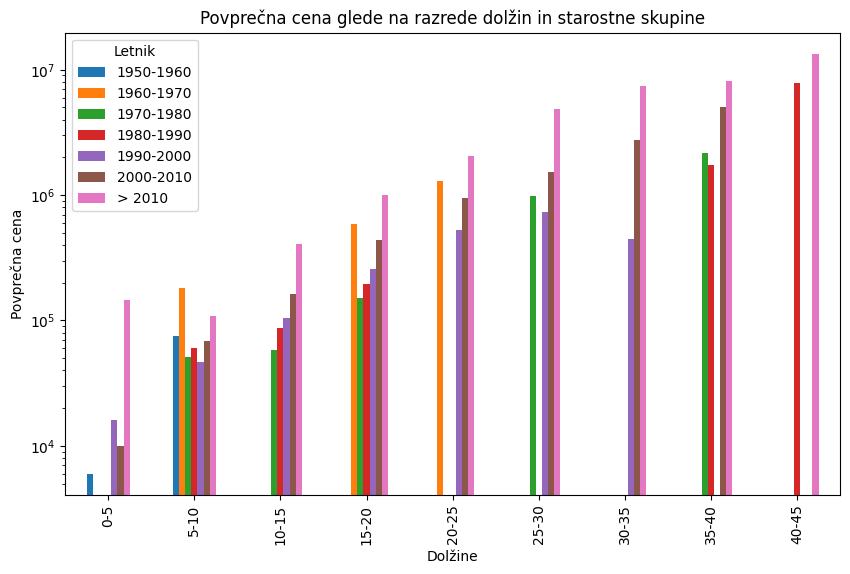

In [232]:
def create_group_label(x):
    group_boundaries = [5 * i for i in range(10)] 
    for i in range(len(group_boundaries) - 1):
        if group_boundaries[i] <= x <= group_boundaries[i + 1]:
            return f"{group_boundaries[i]}-{group_boundaries[i + 1]}"
    return "Other"

barke2["group_1"] = barke2.dolzina.apply(create_group_label)

def categorize_year(year):
    if  year < 1940:
        return "< 1940"
    elif 1940 <= year < 1950:
        return "1940-1950"
    elif 1950 <= year < 1960:
        return "1950-1960"
    elif 1960 <= year < 1970:
        return "1960-1970"
    elif 1970 <= year < 1980:
        return "1970-1980"
    elif 1980 <= year < 1990:
        return "1980-1990"
    elif 1990 <= year < 2000:
        return "1990-2000"
    elif 2000 <= year < 2010:
        return "2000-2010"
    elif 2010 <= year:
        return "> 2010"
    else:
        return "Other"
    

barke2["letnik"] = barke2.letnik.astype(int)
barke2["group_2"] = barke2.letnik.apply(categorize_year)

df_2 = barke2.groupby(["group_1", "group_2"])
df_2 = df_2.cena.mean().reset_index() 
df_2 = df_2.sort_values(by=["group_1", "group_2"]) 

df_2_pivot = df_2.pivot(index="group_1", columns="group_2", values="cena")
df_2_pivot = df_2_pivot.reindex([f"{5 * i}-{5 * (i+1)}" for i in range(9)])
df_2_pivot.plot(
    title="Povprečna cena glede na razrede dolžin in starostne skupine",
    xlabel="Dolžine",
    ylabel="Povprečna cena",
    kind="bar", 
    logy=True, 
    figsize=(10, 6)
)
plt.legend(title="Letnik")

Zgornji graf nam prikazuje, kako se spreminja povprečna cena bark po različnih dolžinah in starostih, na y-osi sem uporabil logaritemsko skalo, da je lažje odčitati povprečne cene. Pri večini razredih dolžin cena pada s starostjo barke, s kakšno izjemo. Zanimivo je, da pri barkah dolžine 5-10m temu ni tako, povprečne cene so dokaj podobne, izstopajo pa barke izdelane med leti 1960-1970. Razlog za to je lahko, da je za barke iz tistega obdobja malo oglasov in so le te zelo dobro ohranjene ter je zato cena višja. Toda če pogledamo tudi pri drugih dolžinah barke iz tega obdobja ohrnjajo zelo visoko ceno, torej lahko sklepamo da so barke tega obdobja zelo cenjene. Torej je bila 4. hipoteza točna z izjemo bark izdelanih med leti 1960-1970.



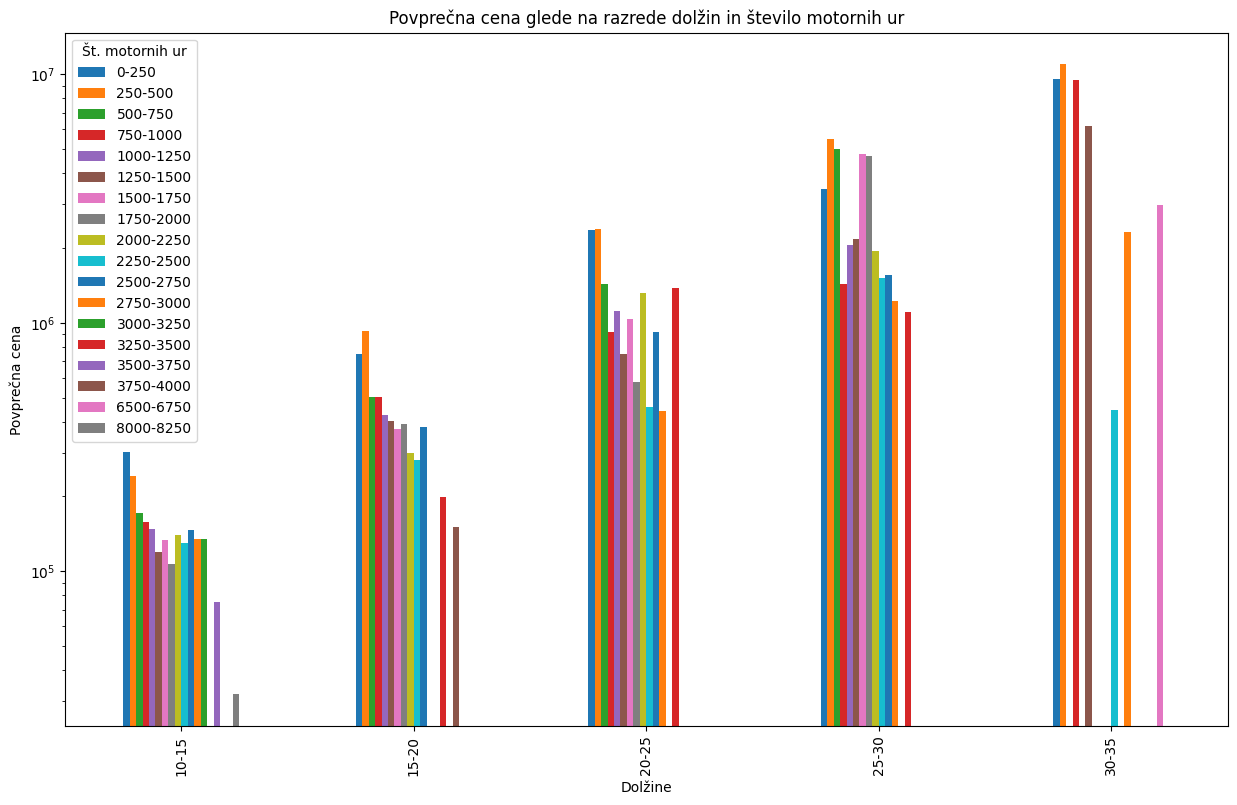

In [141]:
barke3 = pd.read_csv("podatki_bark.csv", index_col="id")

barke3 = barke3.dropna(subset=["dolzina", "st_ur", "cena"])
barke3 = barke3.reset_index(drop=True)
columns_to_drop = ["ime_barke", "tip_barke", "sirina", "st_kabin", "letnik", "drzava"]
barke3.drop(columns=columns_to_drop, inplace=True)
barke3 = barke3[(barke3.dolzina > 10) & (barke3.dolzina <= 35)]

barke3["floor_dolzine"] = np.floor(barke3["dolzina"])
barke3["range_dolzine"] = barke3.apply(lambda row: f"{int(row['floor_dolzine'])} - {int(row['floor_dolzine']) + 1}", axis=1)

df3 = barke3.groupby("range_dolzine").cena.mean().reset_index()
df3.columns = ["range_dolzine", "mean_cena"]
barke3 = barke3.sort_values(by="range_dolzine")

def create_group_label(x):
    group_boundaries = [5 * i for i in range(11)] 
    for i in range(len(group_boundaries) - 1):
        if group_boundaries[i] <= x <= group_boundaries[i + 1]:
            return f"{group_boundaries[i]}-{group_boundaries[i + 1]}"
    return "Other"

barke3["group_1"] = barke3.dolzina.apply(create_group_label)

def categorize_st_ur(st_ur):
    zaokrozeno = round(st_ur / 250.0) * 250.0
    if st_ur - zaokrozeno >= 0:
        return f"{int(zaokrozeno)}-{int(zaokrozeno) + 250}"
    else:
        return f"{int(zaokrozeno) - 250}-{int(zaokrozeno)}"

barke3["st_ur"] = barke3.st_ur.astype(int)
barke3["group_2"] = barke3.st_ur.apply(categorize_st_ur)

df_3 = barke3.groupby(["group_1", "group_2"])
df_3 = df_3.cena.mean().reset_index() 
df_3 = df_3.sort_values(by=["group_1", "group_2"])

df_3_pivot = pd.pivot_table(df_3, values="cena", index="group_1", columns="group_2")
df_3_pivot = df_3_pivot.reindex([f"{i * 250}-{(i+1) * 250}" for i in range(16)] + ["6500-6750", "8000-8250"], axis=1)
df_3_pivot.plot(
    title="Povprečna cena glede na razrede dolžin in število motornih ur",
    xlabel="Dolžine",
    ylabel="Povprečna cena",
    kind="bar", 
    logy=True, 
    figsize=(15, 9)
)
plt.legend(title="Št. motornih ur")

Zgornji graf nam prikazuje, kako se spreminja povprečna cena barke po razredih dolžin glede na število motornih ur (koliko ur je motor deloval). Dolžine sem omejil, ker je bilo pri ostalih res malo podatkov. Pričakovano vidimo, da z večanjem števila ur cena vpada. Vmes je par izjem, kar je verjetno posledica premalo oglasov na določeno skupino ur in razred dolžin, da bi dobili pravo povpečje, torej je kakšna barka zelo dobro ohranjena ali pa boljšega proizvajalca in kljub večjemu številu ur drži višjo ceno ter je posledično zviša povprečje. Če privzamemo, da prejšnja poved drži, je 5. hipoteza potrjena.



In [190]:
barke4 = pd.read_csv("podatki_bark.csv", index_col="id")
barke4 = barke4.dropna(subset=["cena"])
barke4 = barke4[(barke4.dolzina) < 16 & (barke4.dolzina >= 8)]
barke_slovenia = barke4[barke4.drzava == "Slovenia"]
barke_italija = barke4[barke4.drzava == "Italy"]

def boljse_povprecje(i):
    sez_povprecji = []
    for _ in range(i):
        sez_povprecji.append(barke_italija.sample(30).mean(numeric_only=True).cena)
    return sum(sez_povprecji) / len(sez_povprecji)

povp_slo = round(barke_slovenia.mean(numeric_only=True).cena, 2)
povp_ita = round(boljse_povprecje(10000), 2)

print(f"Povprečje Slovenija: {povp_slo} €\nPovprečje Italija: {povp_ita} €")

Povprečje Slovenija: 353901.07 €
Povprečje Italija: 166054.36 €


Izračunal sem še povprečne cene bark v Sloveniji in italiji, ker je bilo bistveno manj oglasov za barke iz Slovenije, sem podatke malce omejil. Najprej sem omejil dolžino na tak interval, kjer je bilo največ bark iz Slovenije, da ni dolžina igrala prevelik faktor pri cenah. Na tem intervalu sem dobil 30 oglasov, zato sem iz italijanskih bark naključno izbral 30 oglasov in zanje izračunal povprečje. Tako sem 10 000-krat izračunal povprečje naključno izbranih bark in na koncu izračunal povprečje teh povprečji, da bi dobil recimo temu "pravo" povprečje. Vidimo, da je povprečna cena italijanskih bark za več kot polovico cenejša od slovenskih. Mislim, da je razlog tako majhno število slovenskih oglasov, če bi jih bilo več bi dobili boljšo sliko situacije na trgu. Torej glede na te podatke prva hipoteza ni pravilna.

S tem je analiza bark zaključena.